## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineData = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
combineData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
total_mice = combineData["Mouse ID"].count()
total_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
total_mice_reduce = combineData.loc[:, ['Mouse ID', 'Timepoint']]

total_mice_reduce["Mouse ID"].duplicated()
total_mice_reduce[total_mice_reduce["Mouse ID"].duplicated()]

Duplicate_mice = total_mice_reduce["Mouse ID"].unique()

Duplicate_mice

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
drop_dup_mouse = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

study_results = study_results[study_results['Mouse ID'].isin(drop_dup_mouse)==False]
clean_mice = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_dup_mouse)==False]
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [42]:
# Checking the number of mice in the clean DataFrame.
clean_mice_total = pd.DataFrame(clean_mice, columns=['Mouse ID'])
clean_mice_total


,Mouse ID
0,k403
1,s185
2,x401
3,m601
4,g791
...,...
244,z314
245,z435
246,z581
247,z795


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
ms_mean = combineData.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
ms_median = combineData.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
ms_variance = combineData.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
ms_standard_deviation = combineData.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
ms_sem = combineData.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

table_mean = pd.DataFrame(ms_mean)
table_comp = table_mean.rename(columns={"Tumor Volume (mm3)": "Mean"})

table_comp.assign(Median=ms_median,Variance=ms_variance,Standard_deviation=ms_standard_deviation,SEM=ms_sem)


,Mean,Median,Variance,Standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
print(table_comp)

                   Mean
Drug Regimen           
Capomulin     40.675741
Ceftamin      52.591172
Infubinol     52.884795
Ketapril      55.235638
Naftisol      54.331565
Placebo       54.033581
Propriva      52.322552
Ramicane      40.216745
Stelasyn      54.233149
Zoniferol     53.236507


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

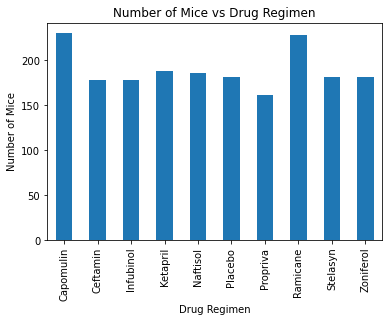

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
barpd_data = combineData.groupby('Drug Regimen').count()['Mouse ID']
bar_plot_data = barpd_data.plot.bar(rot='vertical',title='Number of Mice vs Drug Regimen')

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Mice")


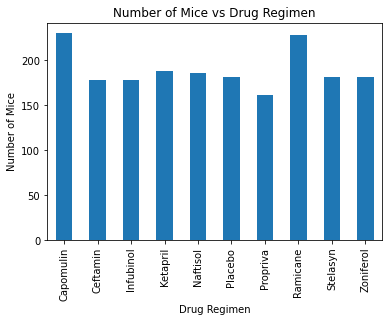

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
barpd_data = combineData.groupby('Drug Regimen').count()['Mouse ID']
barpd_data_df = pd.DataFrame(barpd_data)

plt.xdata = barpd_data_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice vs Drug Regimen')

plt.show()


Text(0.5, 1.0, 'Dist of M v F')

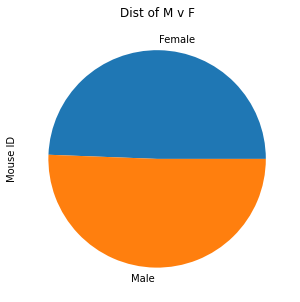

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combineData.groupby('Sex').count()['Mouse ID']

gender_df = pd.DataFrame(gender)

pie_plot = gender.plot.pie(y='Sex', figsize=(5,5))
plt.title('Dist of M v F')


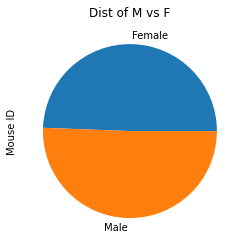

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combineData.groupby('Sex').count()['Mouse ID']
gender_df = pd.DataFrame(gender)
gender_df 

plt.pie(gender,labels=gender.index);
plt.title('Dist of M vs F')
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_test = combineData.loc[combineData["Drug Regimen"] == "Capomulin",:]
ramicane_test = combineData.loc[combineData["Drug Regimen"] == "Ramicane", :]
infubinol_test = combineData.loc[combineData["Drug Regimen"] == "Infubinol", :]
ceftamin_test = combineData.loc[combineData["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
cap_max = capomulin_test.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)
cap_max_merge = pd.merge(cap_max_df,combineData,on=("Mouse ID","Timepoint"),how="left")
cap_max_merge.head()

ram_max = ramicane_test.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)
ram_max_merge = pd.merge(ram_max_df,combineData,on=("Mouse ID","Timepoint"),how="left")
ram_max_merge.head()

inf_max = infubinol_test.groupby('Mouse ID').max()['Timepoint']
inf_max_df = pd.DataFrame(inf_max)
inf_max_merge = pd.merge(inf_max_df,combineData,on=("Mouse ID","Timepoint"),how="left")
inf_max_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cef_max = ceftamin_test.groupby('Mouse ID').max()['Timepoint']
cef_max_df = pd.DataFrame(cef_max)
cef_max_merge = pd.merge(cef_max_df,combineData,on=("Mouse ID","Timepoint"),how="left")
cef_max_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumors = cap_max_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers could be values below {cap_lower_bound} and above {cap_upper_bound} could be outliers.")

ram_tumors = ram_max_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers could be values below {ram_lower_bound} and above {ram_upper_bound} could be outliers.")

inf_tumors = inf_max_merge["Tumor Volume (mm3)"]

inf_quartiles = inf_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers could be values below {inf_lower_bound} and above {inf_upper_bound} could be outliers.")

cef_tumors = cef_max_merge["Tumor Volume (mm3)"]

cef_quartiles = cef_tumors.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers could be values below {cef_lower_bound} and above {cef_upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

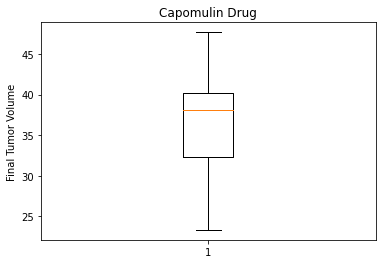

In [48]:
#Capomulin final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(cap_tumors)
plt.show()

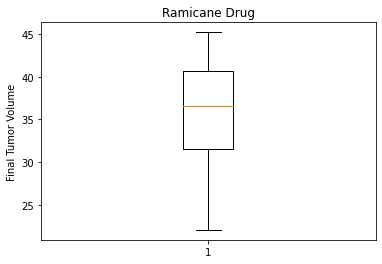

In [49]:
#Ramicane final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ram_tumors)
plt.show()

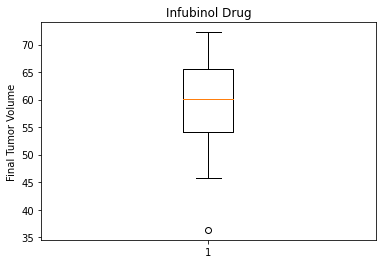

In [50]:
#Infubinol final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(inf_tumors)
plt.show()

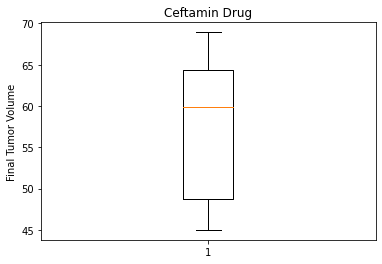

In [51]:
#Ceftamin final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(cef_tumors)
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_line = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
drug_line.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


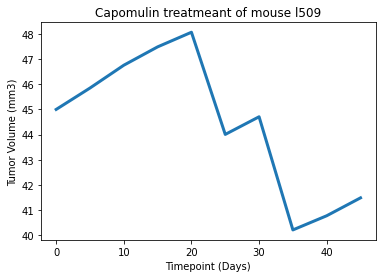

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis_tp = drug_line["Timepoint"]
tv = drug_line["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_tp,tv,linewidth=3, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('lineplotchart')
plt.show()

## Correlation and Regression

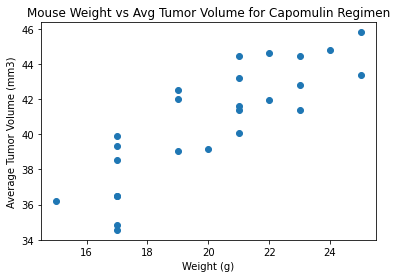

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_average = capomulin_test.groupby(['Mouse ID']).mean()
plt.scatter(cap_df_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.savefig('scatterplotaverage')
plt.show()

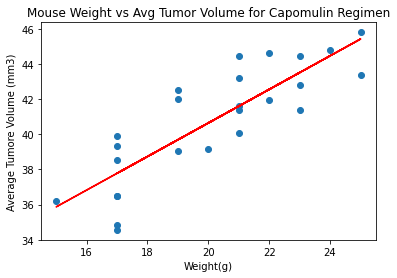

In [55]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
lr_model=st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
lr_model

lr_slope = 0.9544396890241045 
lr_intercept= 21.552160532685015

y_values = capomulin_average['Weight (g)']*lr_slope+lr_intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')

plt.savefig('regression')
plt.show()